<a href="https://colab.research.google.com/github/Anjanikumar98/ML/blob/main/loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn import datasets
from sklearn.svm import SVC


Load Dataset

In [ ]:

# Load the dataset
file_path = '/loan_data.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(data.head(), "\n")

First few rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128             360.0   
1             3000                0.0          66             360.0   
2             2583             2358.0         120             360.0   
3             6000                0.0         141             360.0   
4             2333             1516.0          95             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban    

In [ ]:
print("Dataset information:")
print(data.info(), "\n")

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB
None 



In [ ]:
print("Summary statistics:")
print(data.describe(), "\n")

Summary statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        370.000000   
mean       3579.845144        1277.275381  104.986877        340.864865   
std        1419.813818        2340.818114   28.358464         68.549257   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      351.000000  
mean         0.837607  
std          0.369338  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000   



In [ ]:
print("Checking for missing values:")
print(data.isnull().sum(), "\n")

Checking for missing values:
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64 



In [ ]:
# Define variables
TARGET = 'Loan_Status'
FEATURES = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']
NUM_FEATURES = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
CAT_FEATURES = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'Credit_History', 'Property_Area']
FEATURES_TO_ENCODE = ['Gender', 'Married', 'Dependents', 'Education',
                      'Self_Employed', 'Credit_History', 'Property_Area']

In [ ]:
# Handling missing values
# Categorical features - fill with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[CAT_FEATURES] = categorical_imputer.fit_transform(data[CAT_FEATURES])

In [ ]:
# Numerical features - fill with median
numerical_imputer = SimpleImputer(strategy='median')
data[NUM_FEATURES] = numerical_imputer.fit_transform(data[NUM_FEATURES])

In [ ]:
# Encoding categorical features
label_encoders = {}
for col in FEATURES_TO_ENCODE:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Encode the target variable
target_le = LabelEncoder()
data[TARGET] = target_le.fit_transform(data[TARGET])

In [ ]:
# Split the data into training and testing sets
X = data[FEATURES]
y = data[TARGET]

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Feature Scaling

In [ ]:
# Feature scaling (important for some models)
scaler = StandardScaler()
X_train[NUM_FEATURES] = scaler.fit_transform(X_train[NUM_FEATURES])
X_test[NUM_FEATURES] = scaler.transform(X_test[NUM_FEATURES])

Model Intilaization

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [ ]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Scores

In [ ]:
# Display results
print("Model Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

Model Performance:
Logistic Regression: 0.84
Decision Tree: 0.79
Random Forest: 0.85


NB

In [3]:
data = load_iris()
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [13]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]), y_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [14]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [15]:
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

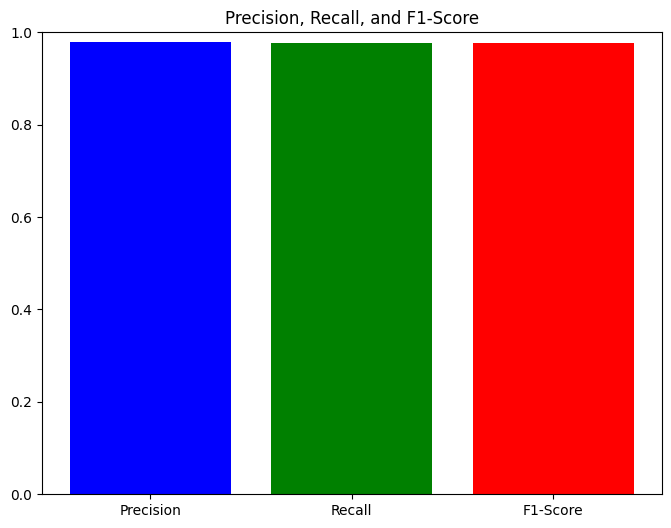

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score')
plt.show()

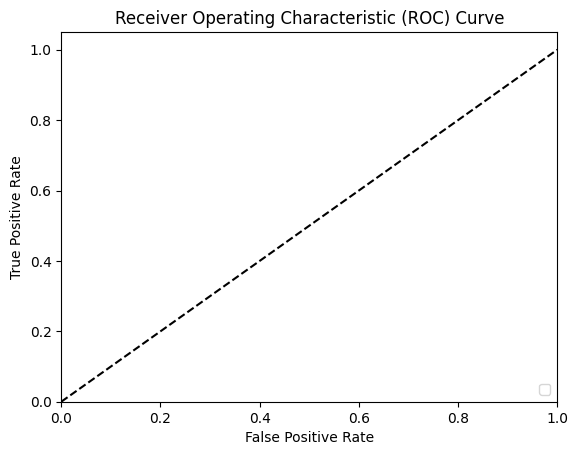

In [18]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

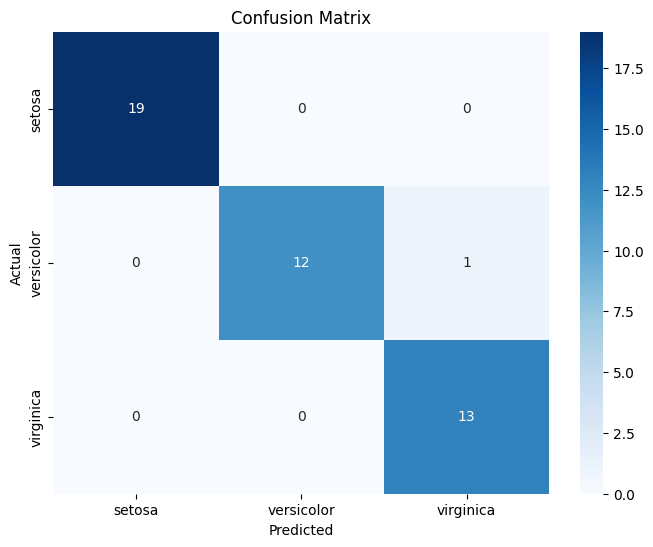

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM

In [21]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [22]:
X = X[y != 2]
y = y[y != 2]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
svm_model = SVC(kernel='linear')

In [25]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svm_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
